In [61]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans as kmeans
from sklearn.decomposition import PCA
os.chdir('W:/iMQ/X_Marketing/!Projects/=DANONE/DanoneRussia#11821_PRO U&A_2016/segmentation')

In [18]:
df = pd.read_csv('clu_3q.csv')

C:\Users\Aleksandr.Turutin\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (251,420,704) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [87]:
# df.iloc[:, 29:92].columns 
X = scale(df.iloc[:, 29:92].values)

C:\Users\Aleksandr.Turutin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [98]:
pca = PCA(copy=True, n_components=10)
X_pca = pca.fit_transform(X)

In [41]:
score = []
for clu in ['CLU3_1','CLU4_1','CLU5_1','CLU6_1','CLU7_1']:
    score.append(silhouette_score(X, df[clu]))

In [89]:
kmeans_clu = []
for i in range(3,8):
    kmeans_clu.append(kmeans(i, n_jobs=2).fit_predict(X))

In [113]:
kmeans_clu_pca = []
for i in range(3,8):
    kmeans_clu_pca.append(kmeans(i, n_jobs=2).fit_predict(X_pca))

In [93]:
# pd.Series(k3).value_counts()

kmeans_clu_pca = []
for i in range(3,8):
    kmeans_clu_pca.append(kmeans(i, n_jobs=2).fit_predict(X_pca))

score_kmeans = []
for clu in kmeans_clu:
    score_kmeans.append(silhouette_score(X, clu))

In [95]:
score_kmeans

[0.055219447047990283,
 0.045362442036499764,
 0.039001601486731444,
 0.03154436035102326,
 0.030700884301607768]

In [114]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_coord = tsne.fit_transform(X)

In [115]:
import seaborn as sns
%matplotlib inline

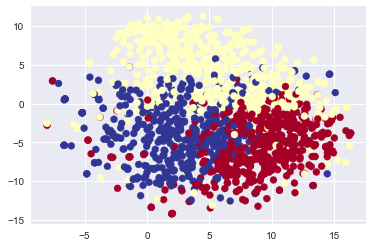

In [133]:
sns.plt.scatter(tsne_coord[:, 0], tsne_coord[:, 1], c=kmeans_clu_pca[0], cmap='RdYlBu')

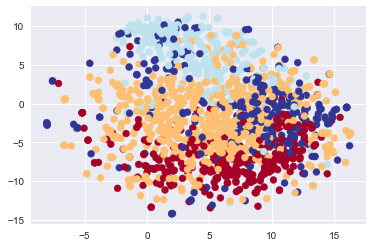

In [129]:
sns.plt.scatter(tsne_coord[:, 0], tsne_coord[:, 1], c=, cmap='RdYlBu')
# sns.plt.scatter(tsne_coord[:, 0], tsne_coord[:, 1], c=df.CLU7_1, cmap='RdYlBu')

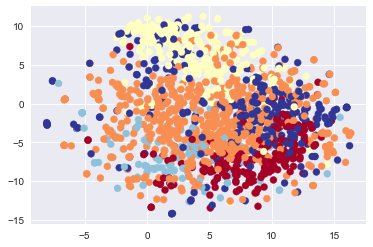

In [130]:
sns.plt.scatter(tsne_coord[:, 0], tsne_coord[:, 1], c=df.CLU5_1, cmap='RdYlBu')

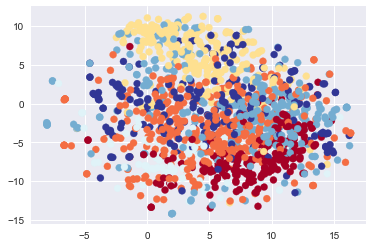

In [131]:
sns.plt.scatter(tsne_coord[:, 0], tsne_coord[:, 1], c=df.CLU6_1, cmap='RdYlBu')

In [146]:
X = scale(df.iloc[:, 29:92].values, axis=1)

C:\Users\Aleksandr.Turutin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [148]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(20)
pca = PCA(copy=True, n_components=20)
X_fa = fa.fit_transform(X)
X_pca = pca.fit_transform(X)

In [203]:
def silh_kmeans_score(X_clu, n):

    pca = PCA(copy=True, n_components=n)
    X_pca = pca.fit_transform(X_clu)
    
    clu_list = []
    for i in range(3,6):
        clu_list.append(kmeans(i, n_jobs=3).fit_predict(X_pca))

    score_kmeans = []
    score_kmeans.append((n, 
                         silhouette_score(X_pca, clu_list[0]), 
                         silhouette_score(X_pca, clu_list[1]), 
                         silhouette_score(X_pca, clu_list[2])
                       ));
                        
    return score_kmeans

X = scale(df.iloc[:, 1:92].values, axis=1)
scores = []
for n_c in [3,5,10]:
    scores.append(silh_kmeans_score(X, n_c))
    
scores

C:\Users\Aleksandr.Turutin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


[[(3, 0.25394693379256722, 0.2747396223739994, 0.25255733005157449)],
 [(5, 0.16858576765452982, 0.18060587445344015, 0.16648253961787163)],
 [(10, 0.10497671595233099, 0.11092627717506619, 0.10045234255589187)]]

In [317]:
def silh_kmeans_score_fa(X_clu, n):

    fa = FactorAnalysis(n)
    X_fa = fa.fit_transform(X_clu)
    
    clu_list = []
    for i in range(3,8):
        clu_list.append(kmeans(i, n_jobs=3).fit_predict(X_fa))

    score_kmeans = []
    score_kmeans.append((n, 
                         silhouette_score(X_fa, clu_list[0]), 
                         silhouette_score(X_fa, clu_list[1]), 
                         silhouette_score(X_fa, clu_list[2]),
                         silhouette_score(X_fa, clu_list[3]),
                         silhouette_score(X_fa, clu_list[4])
                       ));
                        
    return score_kmeans

scores = []
for n_c in [3, 5]:
    scores.append(silh_kmeans_score_fa(X, n_c))
        
scores

[[(3,
   0.24264264149198811,
   0.26287599312376397,
   0.2379665445143172,
   0.24536893162809126,
   0.2354370090063721)],
 [(5,
   0.15120995457864092,
   0.16139986670128023,
   0.16131094150705716,
   0.1625060151178167,
   0.15883175444899289)]]

In [204]:
# X = scale(df.iloc[:, 29:92].values, axis=1)
pca = PCA(copy=True, n_components=3)
X_pca = pca.fit_transform(X)

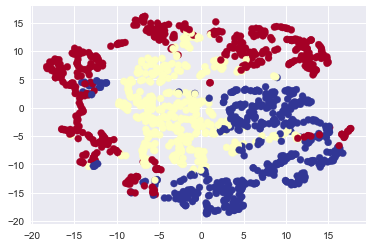

In [202]:
clusters = kmeans(3, n_jobs=3).fit_predict(X_pca)
tsne_coord = tsne.fit_transform(X_pca)
sns.plt.scatter(tsne_coord[:, 0], tsne_coord[:, 1], c=clusters, cmap='RdYlBu')

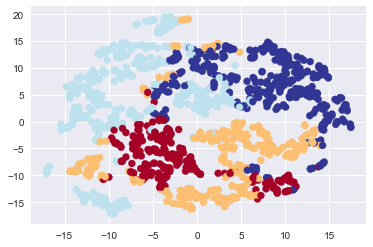

In [166]:
clusters = kmeans(4, n_jobs=3).fit_predict(X_pca)
tsne_coord = tsne.fit_transform(X_pca)
sns.plt.scatter(tsne_coord[:, 0], tsne_coord[:, 1], c=clusters, cmap='RdYlBu')

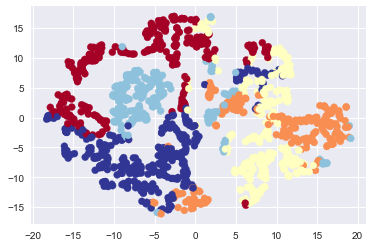

In [167]:
clusters = kmeans(5, n_jobs=3).fit_predict(X_pca)
tsne_coord = tsne.fit_transform(X_pca)
sns.plt.scatter(tsne_coord[:, 0], tsne_coord[:, 1], c=clusters, cmap='RdYlBu')

In [205]:
clusters3 = kmeans(3, n_jobs=3).fit_predict(X_pca)
clusters4 = kmeans(4, n_jobs=3).fit_predict(X_pca)
clusters5 = kmeans(5, n_jobs=3).fit_predict(X_pca)

In [273]:
# df_out = pd.DataFrame(data=np.vstack([df.SbjNum, clusters3, clusters4, clusters5, X_pca.T]).T)
df_out = pd.DataFrame(data=np.vstack([df.SbjNum, clusters3, clusters4, clusters5, X_fa.T]).T)

In [274]:
df_out = pd.DataFrame(data=np.vstack([df.SbjNum, clusters3, clusters4, clusters5, X_fa.T]).T)
df_out.columns = ['SbjNum', 'clu3_1','clu4_1','clu5_1','com1','com2','com3','com4','com5']
df_out.to_csv('kmeans_v4_fa.csv')

In [276]:
df_out.to_csv('kmeans_v4_fa.csv')

In [211]:
X_pca.shape

(1397, 3)

In [266]:
from statsmodels.tools.eval_measures import bic
bic_scores = []
def fa_bic(n):
    fa = FactorAnalysis(n)
    X_fa = fa.fit_transform(X)
    par = n * (n - 1) / 2
    return par, fa.loglike_[-1], np.log(1397) * par - 2 * fa.loglike_[-1]
for i in [2,3,4,5,6,7,10,20]:
    bic_scores.append(fa_bic(i))
bic_scores

[(1.0, -161952.11978487726, 323911.48165211378),
 (3.0, -160619.71135822855, 321261.14896353486),
 (6.0, -159764.19596081393, 319571.84441578342),
 (10.0, -158938.40222572433, 317949.22527504124),
 (15.0, -158262.24437048542, 316633.11997635971),
 (21.0, -157630.64955638003, 315413.38284230448),
 (45.0, -156691.25644936692, 313708.40660490037),
 (190.0, -154838.78010552839, 311053.55585931562)]

In [270]:
fa = FactorAnalysis(5)
X_fa = fa.fit_transform(X)

array([[  3.07561948e-01,   3.88387102e-04,  -1.19709506e-01,
          2.63573222e-01,   1.85556566e-01,  -2.75046472e-01,
          2.96546034e-01,  -1.43735353e-01,  -2.45976094e-02,
          2.07040724e-01,   2.75451138e-01,   1.85865346e-01,
          1.89110821e-01,  -4.52336418e-02,   7.88693027e-02,
          1.86111022e-01,   8.56999960e-02,   2.85001228e-01,
         -2.24383828e-01,   9.26494437e-02,   2.07456666e-02,
         -1.08679277e-01,   2.94965622e-01,   2.82100182e-01,
          1.07714656e-01,   9.58014800e-02,   3.40605644e-01,
         -2.29768205e-01,  -3.00702861e-01,   2.19955695e-01,
          2.48322576e-01,  -4.09711900e-01,  -3.30624573e-01,
         -3.41489475e-01,   4.09156958e-01,   3.33868310e-01,
          2.74804699e-01,  -2.26306604e-01,   2.88530858e-01,
          2.55767021e-02,   2.07772752e-01,   1.41860813e-01,
         -1.04023461e-01,  -2.32030440e-01,  -1.59061140e-01,
         -1.01856159e-01,   5.77392883e-02,   8.51364243e-02,
        

In [307]:
fa_com = pd.DataFrame(X_fa)
fa_X = pd.DataFrame(X)
# pd.concat([fa_X.corrwith(axis=0, other=fa_com[0]), fa_X.corrwith(axis=0, other=fa_com[1])])

(182,)

In [309]:
df = pd.read_csv('clu_3q_drop.csv')
X = scale(df.iloc[:, 1:].values, axis=1)

C:\Users\Aleksandr.Turutin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [314]:
scores = []
for n_c in [3,5]:
    scores.append(silh_kmeans_score(X, n_c))
        
scores

[[(3, 0.25794186107518957, 0.25498506883737554, 0.23997464020223941)],
 [(5, 0.17353872405257609, 0.17583314666476041, 0.17003465018217293)],
 [(10, 0.10645070849391132, 0.10692241635478006, 0.098920711644854123)]]

In [336]:
# 3 coms 
pca = PCA(copy=True, n_components=4)
X_pca = pca.fit_transform(X)

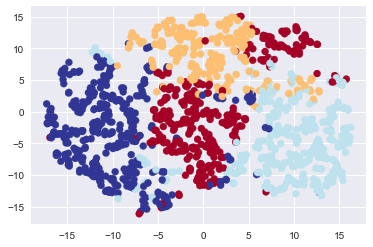

In [337]:
clusters = kmeans(4, n_jobs=3).fit_predict(X_pca)
tsne_coord = tsne.fit_transform(X_pca)
sns.plt.scatter(tsne_coord[:, 0], tsne_coord[:, 1], c=clusters, cmap='RdYlBu')

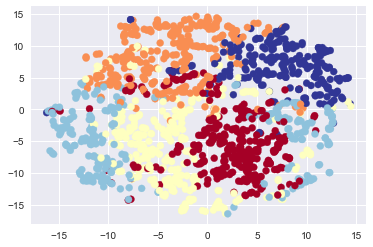

In [340]:
pca = PCA(copy=True, n_components=6)
X_pca = pca.fit_transform(X)
clusters = kmeans(5, n_jobs=3).fit_predict(X_pca)
tsne_coord = tsne.fit_transform(X_pca)
sns.plt.scatter(tsne_coord[:, 0], tsne_coord[:, 1], c=clusters, cmap='RdYlBu')

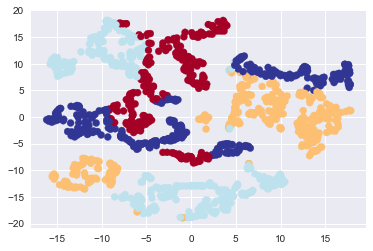

In [334]:
pca = PCA(copy=True, n_components=2)
X_pca = pca.fit_transform(X)
clusters = kmeans(4, n_jobs=3).fit_predict(X_pca)
tsne_coord = tsne.fit_transform(X_pca)
sns.plt.scatter(tsne_coord[:, 0], tsne_coord[:, 1], c=clusters, cmap='RdYlBu')

In [342]:
X_pca_3 = PCA(copy=True, n_components=3).fit_transform(X)
X_pca_6 = PCA(copy=True, n_components=3).fit_transform(X)

def make_kmeans(X_kmeans):
    clu4 = kmeans(4, n_jobs=3).fit_predict(X_kmeans)
    clu5 = kmeans(5, n_jobs=3).fit_predict(X_kmeans)
    clu6 = kmeans(6, n_jobs=3).fit_predict(X_kmeans)
    return clu4,clu5,clu6

In [343]:
out3 = make_kmeans(X_pca_3)
out6 = make_kmeans(X_pca_6)

In [353]:
df_out = pd.DataFrame(data=np.vstack([df.SbjNum, np.array(out3), np.array(out6)])).T

In [355]:
df_out.columns = ['SbjNum', 'clu4','clu5','clu6', 'clu4_2','clu5_2','clu6_2']
df_out.to_csv('kmeans_v5.csv')